In [1]:
! git clone https://github.com/shane200195/Stock_ml.git

Cloning into 'Stock_ml'...
remote: Enumerating objects: 606, done.
remote: Counting objects: 100% (606/606), done.
remote: Compressing objects: 100% (598/598), done.
remote: Total 606 (delta 14), reused 600 (delta 8), pack-reused 0
Receiving objects: 100% (606/606), 23.46 MiB | 19.02 MiB/s, done.
Resolving deltas: 100% (14/14), done.


In [0]:
! ls
! cd Stock_ml
! git init
! git pull https://github.com/shane200195/Stock_ml.git

sample_data  Stock_ml
Reinitialized existing Git repository in /content/.git/
remote: Enumerating objects: 603, done.
remote: Counting objects: 100% (603/603), done.
remote: Compressing objects: 100% (596/596), done.
remote: Total 603 (delta 13), reused 597 (delta 7), pack-reused 0
Receiving objects: 100% (603/603), 23.35 MiB | 18.87 MiB/s, done.
Resolving deltas: 100% (13/13), done.
From https://github.com/shane200195/Stock_ml
 * branch            HEAD       -> FETCH_HEAD


In [2]:
import pandas as pd
import numpy as np

#google was not used in the djia dataset as Google was created significantly later than the other companies, incorporating it would have led to a loss of more than 1000 data points
djia = pd.read_csv("Stock_ml/djia_no_google.csv")
djia = djia.set_index("Date")


for column in djia.columns:
  djia[column + "Volatile?"] = [1 if abs(i) > 0.01 else 0 for i in djia[column]]

# feature selection
target = "MSFT" # stock we want to test correlation with
features = [i for i in djia.columns if "Volatile?" in i and target not in i] #selecting the columns with volatility

x = djia.loc[:,features].values
#selecting the target that will be used to classify a particular state
result = djia[target + "Volatile?"].values

#testing to see if the data fits
print(djia.loc["2006-01-03":"2006-01-25", "JNJVolatile?"])

Date
2006-01-03    0
2006-01-04    1
2006-01-05    0
2006-01-06    0
2006-01-09    0
2006-01-10    0
2006-01-11    0
2006-01-12    0
2006-01-13    0
2006-01-17    0
2006-01-18    0
2006-01-19    0
2006-01-20    0
2006-01-23    0
2006-01-24    1
2006-01-25    1
Name: JNJVolatile?, dtype: int64


Basic PCA to visualize the dataset better

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)

print(principal_components)

[[ 1.37725065 -0.57925166]
 [ 1.30378086 -0.0776373 ]
 [ 1.9080097  -0.07350059]
 ...
 [-0.81789889  0.16511497]
 [ 1.18586014  0.83637335]
 [ 1.29765686  0.63996441]]


In [0]:
principalDf = pd.DataFrame(data = principal_components
             , columns = ['component 1', 'component 2'])

# converting the index of result
result = pd.DataFrame(data = result, columns=["Result"])
finalDf = pd.concat([principalDf, result], axis = 1)
print(finalDf)

      component 1  component 2  Result
0        1.377250    -0.706294       1
1        1.303780    -0.095382       0
2        1.908010    -0.203587       1
3        1.045534     0.198446       0
4        0.993900     0.119367       0
...           ...          ...     ...
5133    -0.695923    -0.269550       0
5134    -0.855045     0.339990       1
5135    -0.817900     0.193427       0
5136     1.185860     0.986408       1
5137     1.297656     0.534300       1

[5138 rows x 3 columns]


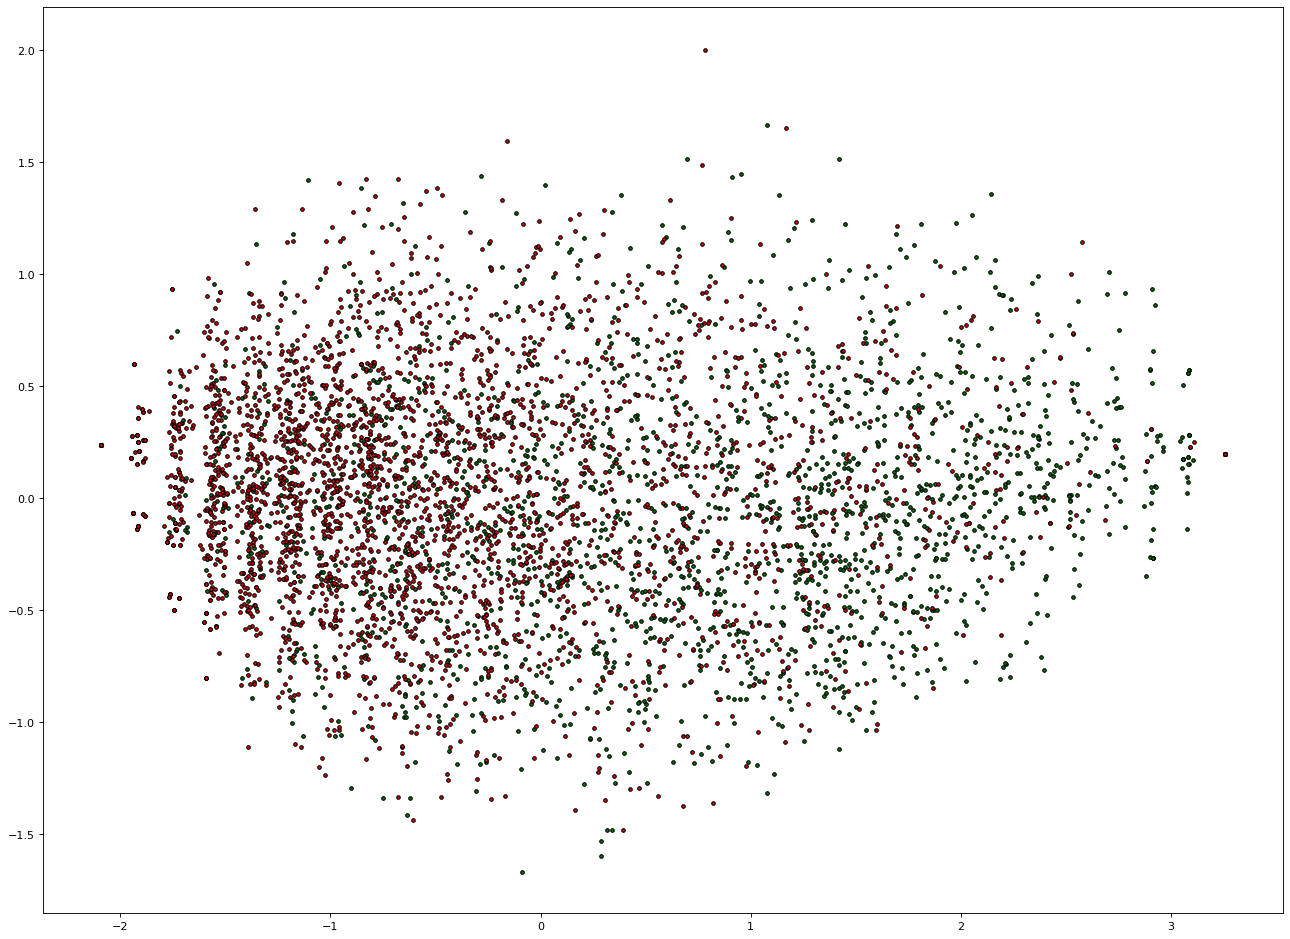

In [0]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 15), dpi=80, facecolor='w', edgecolor='k')
targets = [1, 0]
colors = ['g', 'r']

# graphing the data after PCA, the red color represents a 0 (low volatility), while the green represents a 1 (high volatility)
for target, color in zip(targets, colors):
  indicesToKeep = finalDf["Result"] == target
  plt.scatter(finalDf.loc[indicesToKeep, 'component 1']
               , finalDf.loc[indicesToKeep, 'component 2']
               , c = color
               , s = 10, edgecolor="k")
# plt.scatter(principalDf["component 1"], principalDf["component 2"])
plt.show()


Training SVM model for DJIA dataset

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SVM_djia = SVC(gamma="auto")

# uses all stocks
X_train, X_test, y_train, y_test = train_test_split(x, result, test_size=0.33, random_state=42)

# stocks that have been component reduced
#X_train, X_test, y_train, y_test = train_test_split(finalDf.loc[:, ['component 1', 'component 2']].values, result, test_size=0.5, random_state=42)

SVM_djia.fit(X_train, y_train)

print(SVM_djia.score(X_train, y_train))
print(SVM_djia.score(X_test, y_test))





0.7321324811156305
0.7293632075471698


Training a KNN model for DJIA dataset

In [0]:
from sklearn.neighbors import KNeighborsClassifier

KNN_djia = KNeighborsClassifier(n_neighbors=10)
KNN_djia.fit(X_train, y_train)
#predictions = KNN_sp500.predict(X_test)
#accuracy_score(predictions, y_test)
print(KNN_djia.score(X_train, y_train))
print(KNN_djia.score(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


0.7416201117318436
0.7436260623229461


Logistic Regression for DJIA dataset

In [0]:
from sklearn.linear_model import LogisticRegression

LR_djia = LogisticRegression()
LR_djia.fit(X_train, y_train)

print(LR_djia.score(X_train, y_train))
print(LR_djia.score(X_test, y_test))



0.7402234636871509
0.7563739376770539


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Random Forest Classfier

In [0]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(max_depth = 5)
RFC.fit(X_train, y_train)

print(RFC.score(X_train, y_train))
print(RFC.score(X_test, y_test))


0.7611731843575419
0.7535410764872521


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [0]:
X_train = x[:split]
Y_train = result[:split]

X_test = x[split:]
Y_test = result[split:]

X_train_t = X_train[:, None]
X_test_t = X_test[:, None]
print(X_train[0].shape)

(29,)


Now we will try to build a recurrent neural network, with LSTM to see if it can fit the data better. (Only Dense and LSTM layers are used)

In [5]:
# we need to segregate the new data
split = 4000

X_train = x[:split]
Y_train = result[:split]

X_test = x[split:]
Y_test = result[split:]

#importing the modules needed for the neural network
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.layers import LSTM, GRU


X_train_t = X_train[:, None]
X_test_t = X_test[:, None]
K.clear_session()

model = Sequential()

model.add(Dense(1, input_shape=(1, 29)))
model.add(LSTM(6, input_shape=(1, 29)))
model.add(Dense(1))


#Using Keras Callback
ES = EarlyStopping(monitor='val_loss')

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train_t, Y_train,
         epochs=10, batch_size=1, verbose=1, callbacks=[ES], validation_data = (X_test_t, Y_test))

#model.fit(X_train_t, Y_train,
#         epochs=4, batch_size=1, verbose=1, validation_data = (X_test_t, Y_test))

y_train_lstm = model.predict_classes(X_train_t)
y_test_lstm = model.predict_classes(X_test_t)

print(accuracy_score(Y_train, y_train_lstm))
print(accuracy_score(Y_test, y_test_lstm))



"""
WE WILL USE THIS SECTION TO SEE HOW OUR MODEL VARIES:

OLD DATA:
loss = "mean_squared_error", 2500/519 split
Train: 0.7256
Test: 0.7880539499036608

loss = "mean_squared_error", 2500/519 split, lstm-units = 10
Train: 0.7276
Test: 0.7976878612716763

loss = "mean_absolute_error", 2500/519 split
Train: 0.726
Test: 0.7861271676300579


NEW DATA (Added 2000 more sets of data):
loss = "mean_squared_error", epochs = CallBack-EarlyStopping, 3500/1638 split, lstm-units = 6, layers: LSTM-Dense

model.add(LSTM(6, input_shape=(1, 29)))
model.add(Dense(1))

Train: 0.714
Test: 0.7472527472527473

loss = "mean_squared_error", epochs = CallBack-EarlyStopping, 3500/1638 split, lstm-units = 6, layers: Dense-LSTM-Dense

model.add(Dense(1, input_shape=(1, 29)))
model.add(LSTM(6, input_shape=(1, 29)))
model.add(Dense(1))

Train: 0.712
Test: 0.7490842490842491

4000/1138 split:
Train: 0.7105
Test: 0.7601054481546573

loss = "mean_squared_error", epochs = CallBack-EarlyStopping, 3500/1638 split, lstm-units = 6, layers: Dense-Dense

model.add(Dense(1, input_shape=(29,)))
model.add(Dense(1))

Train: 0.7088571428571429
Test: 0.7478632478632479




"""


Using TensorFlow backend.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 4000 samples, validate on 1138 samples
Epoch 1/10





4000/4000 [==============================] - 10s 3ms/step - loss: 0.2133 - val_loss: 0.1775
Epoch 2/10
4000/4000 [==============================] - 9s 2ms/step - loss: 0.2001 - val_loss: 0.1717
Epoch 3/10
4000/4000 [==============================] - 9s 2ms/step - loss: 0.1976 - val_loss: 0.1695
Epoch 4/10
4000/4000 [==============================] - 9s 2ms/step - loss: 0.1963 - val_loss: 0.1810
0.6935
0.7539543057996485


'\nWE WILL USE THIS SECTION TO SEE HOW OUR MODEL VARIES:\n\nOLD DATA:\nloss = "mean_squared_error", 2500/519 split\nTrain: 0.7256\nTest: 0.7880539499036608\n\nloss = "mean_squared_error", 2500/519 split, lstm-units = 10\nTrain: 0.7276\nTest: 0.7976878612716763\n\nloss = "mean_absolute_error", 2500/519 split\nTrain: 0.726\nTest: 0.7861271676300579\n\n\nNEW DATA (Added 2000 more sets of data):\nloss = "mean_squared_error", epochs = CallBack-EarlyStopping, 3500/1638 split, lstm-units = 6, layers: LSTM-Dense\n\nmodel.add(LSTM(6, input_shape=(1, 29)))\nmodel.add(Dense(1))\n\nTrain: 0.714\nTest: 0.7472527472527473\n\nloss = "mean_squared_error", epochs = CallBack-EarlyStopping, 3500/1638 split, lstm-units = 6, layers: Dense-LSTM-Dense\n\nmodel.add(Dense(1, input_shape=(1, 29)))\nmodel.add(LSTM(6, input_shape=(1, 29)))\nmodel.add(Dense(1))\n\nTrain: 0.712\nTest: 0.7490842490842491\n\n4000/1138 split:\nTrain: 0.7105\nTest: 0.7601054481546573\n\nloss = "mean_squared_error", epochs = CallBack-Ea

Instead of LSTM, we will try with GRU

In [15]:
K.clear_session()
model = Sequential()

model.add(Dense(1, input_shape=(1, 29)))
model.add(GRU(5, input_shape=(1, 29)))
model.add(Dense(1))

ES = EarlyStopping(monitor='val_loss')

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train_t, Y_train,
         epochs=10, batch_size=1, verbose=1, callbacks=[ES], validation_data = (X_test_t, Y_test))

#model.fit(X_train_t, Y_train,
#         epochs=4, batch_size=1, verbose=1, validation_data = (X_test_t, Y_test))

y_train_lstm = model.predict_classes(X_train_t)
y_test_lstm = model.predict_classes(X_test_t)

print(accuracy_score(Y_train, y_train_lstm))
print(accuracy_score(Y_test, y_test_lstm))


"""
loss = "mean_squared_error", epochs = CallBack-EarlyStopping, 4000/1138 split, gru-units = 6, layers: GRU-Dense

model.add(GRU(6, input_shape=(1, 29)))
model.add(Dense(1))

Train: 0.72225
Test: 0.76274165


loss = "mean_squared_error", epochs = CallBack-EarlyStopping, 4000/1138 split, gru-units = 6, layers: Dense-GRU-Dense

model.add(Dense(1, input_shape=(1, 29)))
model.add(GRU(5, input_shape=(1, 29)))
model.add(Dense(1))

Train: 0.71075
Test: 0.7609841827768014


"""

Train on 4000 samples, validate on 1138 samples
Epoch 1/10
4000/4000 [==============================] - 10s 2ms/step - loss: 0.2197 - val_loss: 0.1684
Epoch 2/10
4000/4000 [==============================] - 9s 2ms/step - loss: 0.1998 - val_loss: 0.1675
Epoch 3/10
4000/4000 [==============================] - 9s 2ms/step - loss: 0.1971 - val_loss: 0.1668
Epoch 4/10
4000/4000 [==============================] - 9s 2ms/step - loss: 0.1967 - val_loss: 0.1663
Epoch 5/10
4000/4000 [==============================] - 9s 2ms/step - loss: 0.1958 - val_loss: 0.1664
0.71075
0.7609841827768014


'\nloss = "mean_squared_error", epochs = CallBack-EarlyStopping, 4000/1138 split, gru-units = 6, layers: GRU-Dense\n\nmodel.add(GRU(6, input_shape=(1, 29)))\nmodel.add(Dense(1))\n\nTrain: 0.72225\nTest: 0.76274165\n\n\nloss = "mean_squared_error", epochs = CallBack-EarlyStopping, 4000/1138 split, gru-units = 6, layers: Dense-GRU-Dense\n\nmodel.add(Dense(1, input_shape=(1, 29)))\nmodel.add(GRU(5, input_shape=(1, 29)))\nmodel.add(Dense(1))\n\n\n\n'